In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [325]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

nltk.download('punkt ')
nltk.download('averaged perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Error loading punkt : Package 'punkt ' not found in index
[nltk_data] Error loading averaged perceptron_tagger: Package
[nltk_data]     'averaged perceptron_tagger' not found in index
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\praja\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\praja\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\praja\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<!--  Creating DataSet -->

In [ ]:
dataSet = pd.DataFrame()

In [405]:
dataSet['Customer'] =  np.arange(1,500)
# dataSet.insert(0,'Customer',np.arange(1,500))

In [420]:
dataSet['Environment'] =  np.random.randint(1,6,size = 499)

In [421]:
dataSet['Taste'] =  np.random.randint(1,6,size = 499)

In [422]:
dataSet['Service'] =  np.random.randint(1,6,size = 499)

In [426]:
dataSet['Price'] =  np.random.randint(1,6,size = 499)

In [427]:
city = ['Indore','Dewas','Bhopal','Rewa','Gwalior','Ujjain','Jabalpur','Betul','Khandwa','Mandsaur']

In [428]:
dataSet['Cities'] = np.random.choice(city,size = 499)

In [429]:
#adding text reviews of restaurant 
imCSV = pd.read_csv('Restaurant_Reviews.csv')
dataSet['Review'] = imCSV['Review'][:499]

In [447]:
dataSet


,Customer,Environment,Taste,Service,Price,Cities,Review,Avg_Rating
119,1,1,3,4,1,Bhopal,Although I very much liked the look and sound ...,2.75
120,2,1,1,3,3,Jabalpur,I just don't know how this place managed to se...,2.75
123,3,2,4,3,3,Mandsaur,"The guys all had steaks, and our steak loving ...",3.00
124,4,3,1,1,1,Betul,We thought you'd have to venture further away ...,3.25
127,5,5,5,3,4,Bhopal,"Phenomenal food, service and ambiance.",2.75
...,...,...,...,...,...,...,...,...
494,495,1,2,1,1,Ujjain,Their daily specials are always a hit with my ...,1.25
495,496,5,1,4,3,Jabalpur,And then tragedy struck.,3.25
496,497,2,5,5,4,Gwalior,The pancake was also really good and pretty la...,4.00
497,498,2,3,4,5,Khandwa,"This was my first crawfish experience, and it ...",3.50


In [448]:
# saving created dataset to csv file
dataSet.to_csv('customer_reviews.csv')

In [449]:
dataSet.describe()

,Customer,Environment,Taste,Service,Price,Avg_Rating
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,250.000000,2.969940,2.917836,3.116232,2.929860,2.983467
std,144.193157,1.408914,1.416789,1.376261,1.397463,0.723669
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.250000
25%,125.500000,2.000000,2.000000,2.000000,2.000000,2.500000
50%,250.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,374.500000,4.000000,4.000000,4.000000,4.000000,3.500000
max,499.000000,5.000000,5.000000,5.000000,5.000000,4.750000


In [450]:
dataSet.info() #getting information of columns if they are null or not

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 119 to 498
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer     499 non-null    int32  
 1   Environment  499 non-null    int32  
 2   Taste        499 non-null    int32  
 3   Service      499 non-null    int32  
 4   Price        499 non-null    int32  
 5   Cities       499 non-null    object 
 6   Review       499 non-null    object 
 7   Avg_Rating   499 non-null    float64
dtypes: float64(1), int32(5), object(2)
memory usage: 41.5+ KB


In [451]:
# Calculating Average rating of particular restaurant
dataSet['Avg_Rating'] = [ (dataSet['Environment'][i] + dataSet['Taste'][i] + dataSet['Service'][i] + dataSet['Price'][i])/4 for i in range(499) ]

In [452]:
dataSet.sample(5)

,Customer,Environment,Taste,Service,Price,Cities,Review,Avg_Rating
285,286,4,1,5,1,Mandsaur,Great Pizza and Salads!,2.75
329,330,2,3,4,1,Ujjain,When my mom and I got home she immediately got...,2.50
255,256,4,2,5,4,Dewas,We had 7 at our table and the service was pret...,3.75
302,303,2,3,4,3,Betul,The potato chip order was sad... I could proba...,3.00
141,154,2,2,2,1,Ujjain,The waiter wasn't helpful or friendly and rare...,2.75


In [453]:
total_count = 499
total_count

499

In [454]:
# global average rating of each attribute
avg_rating_of_attribute = {'Environment' : dataSet['Environment'].sum()/total_count ,'Taste' :dataSet['Taste'].sum()/total_count , 'Service':dataSet['Service'].sum()/total_count ,'Price': dataSet['Price'].sum()/total_count}

In [455]:
avg_rating_of_attribute

{'Environment': 2.969939879759519,
 'Taste': 2.917835671342685,
 'Service': 3.1162324649298596,
 'Price': 2.929859719438878}

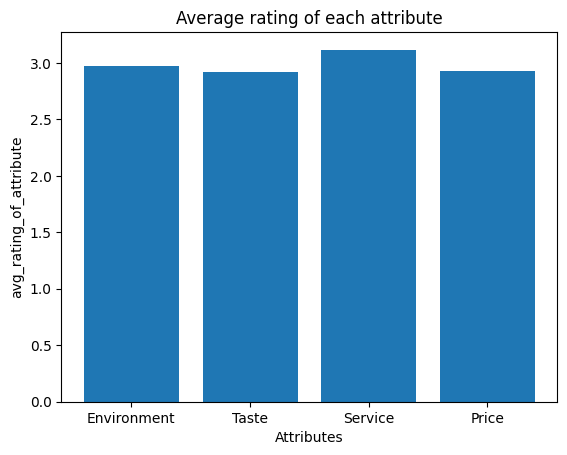

In [456]:
plt.title('Average rating of each attribute')
plt.xlabel("Attributes")
plt.ylabel("avg_rating_of_attribute")
plt.bar(avg_rating_of_attribute.keys(),avg_rating_of_attribute.values());


In [457]:
def avgCal():
    global dataSet
    list_of_city_avg = []
    list_to_carry_avg_of_col = []
    for i in dataSet['Cities'].unique():
        for j in dataSet.keys()[:4]:
            list_to_carry_avg_of_col.append((dataSet[dataSet['Cities'] == i][j].sum())/ (dataSet[dataSet['Cities'] == i][j].count()))
           
        list_of_city_avg.append(sum(list_to_carry_avg_of_col)/4)
        list_to_carry_avg_of_col.clear()
            
    return  list_of_city_avg       
    
    

In [441]:
over_all_avg_of_cities = avgCal()     

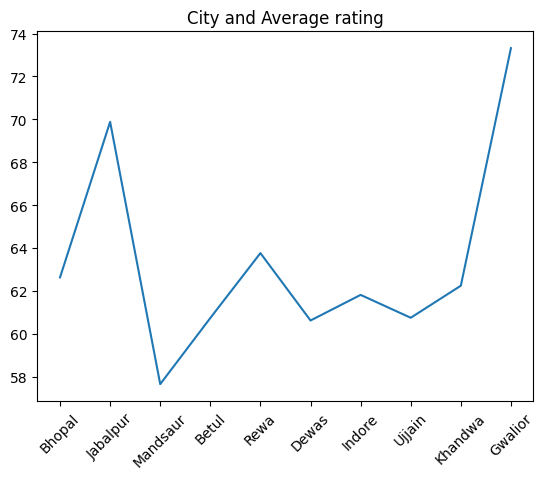

In [443]:
# city vs city average
plt.title('City and Average rating')
plt.xticks(rotation = 45)
plt.plot(dataSet['Cities'].unique(),over_all_avg_of_cities);

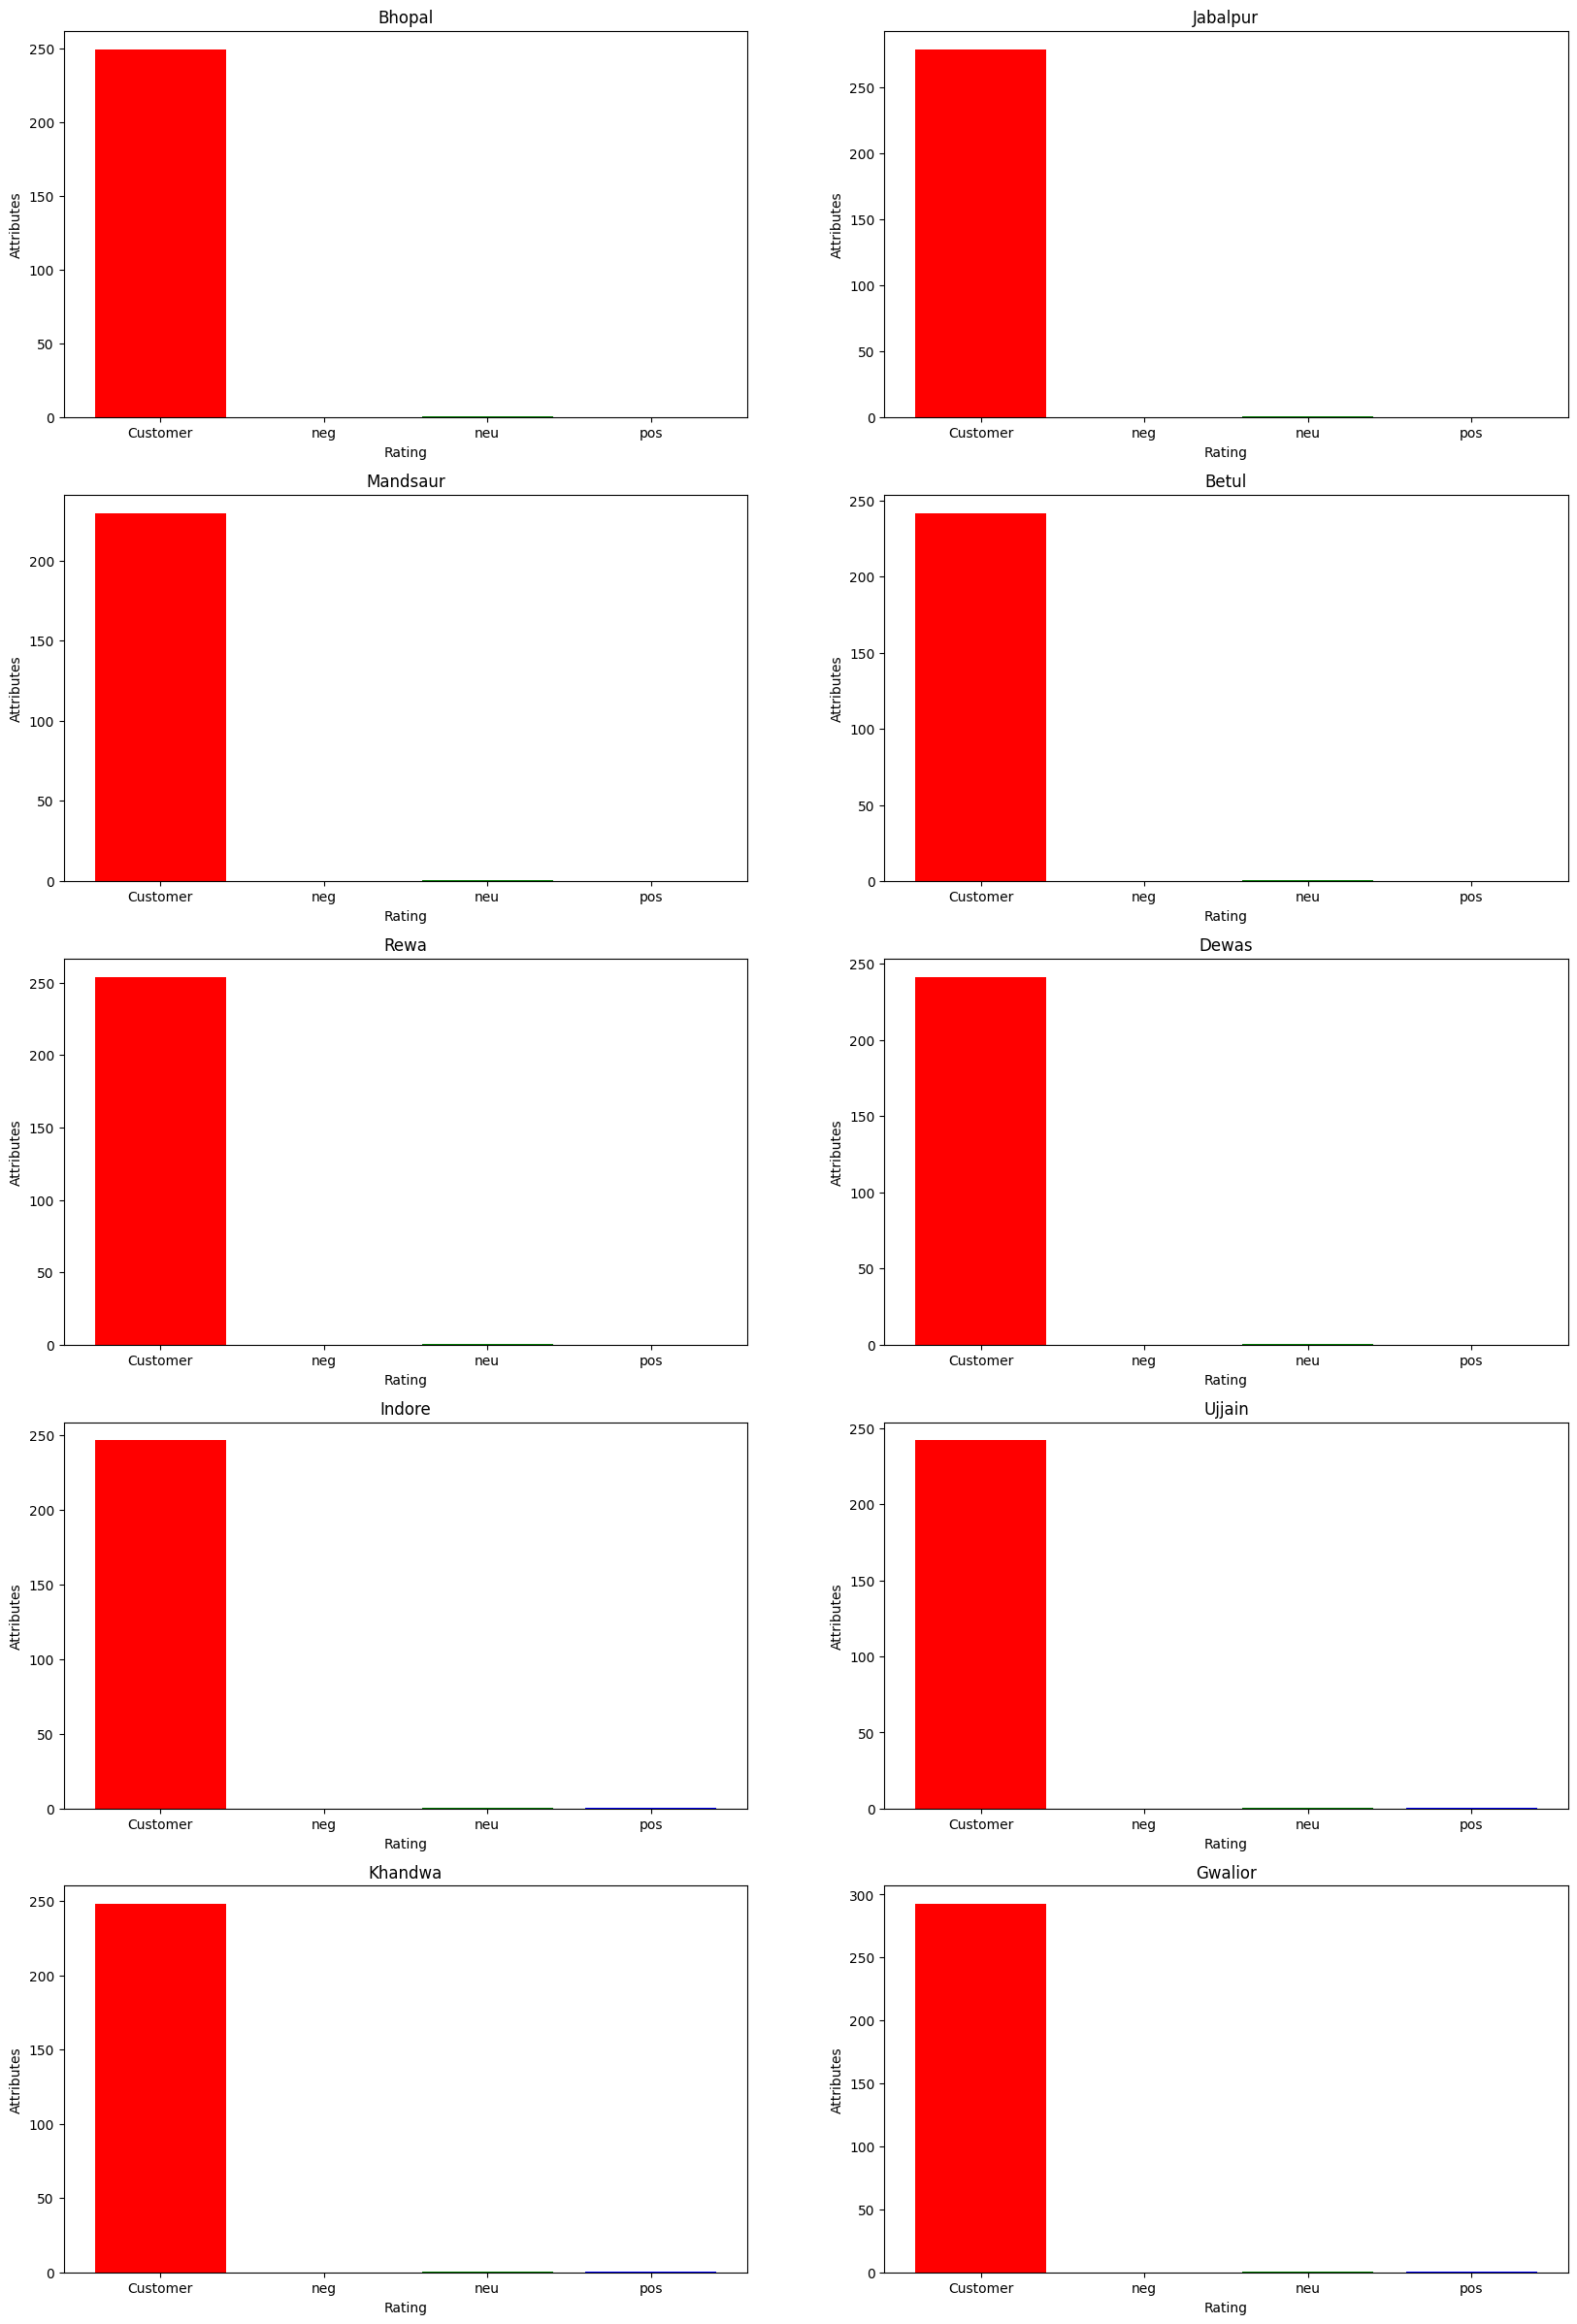

In [444]:
plt.figure(index,figsize = (20,30))
list_to_carry_avg_of_col = []
for index,i in enumerate(dataSet['Cities'].unique()):
    for j in dataSet.keys()[:4]:
        list_to_carry_avg_of_col.append((dataSet[dataSet['Cities'] == i][j].sum())/ (dataSet[dataSet['Cities'] == i][j].count()))
    plt.subplot(5,2, index + 1)
    plt.title(i)
    plt.xlabel('Rating')
    plt.ylabel('Attributes')
    plt.bar(dataSet.keys()[:4],list_to_carry_avg_of_col,color = ['r','y','g','b'])
    list_to_carry_avg_of_col = []

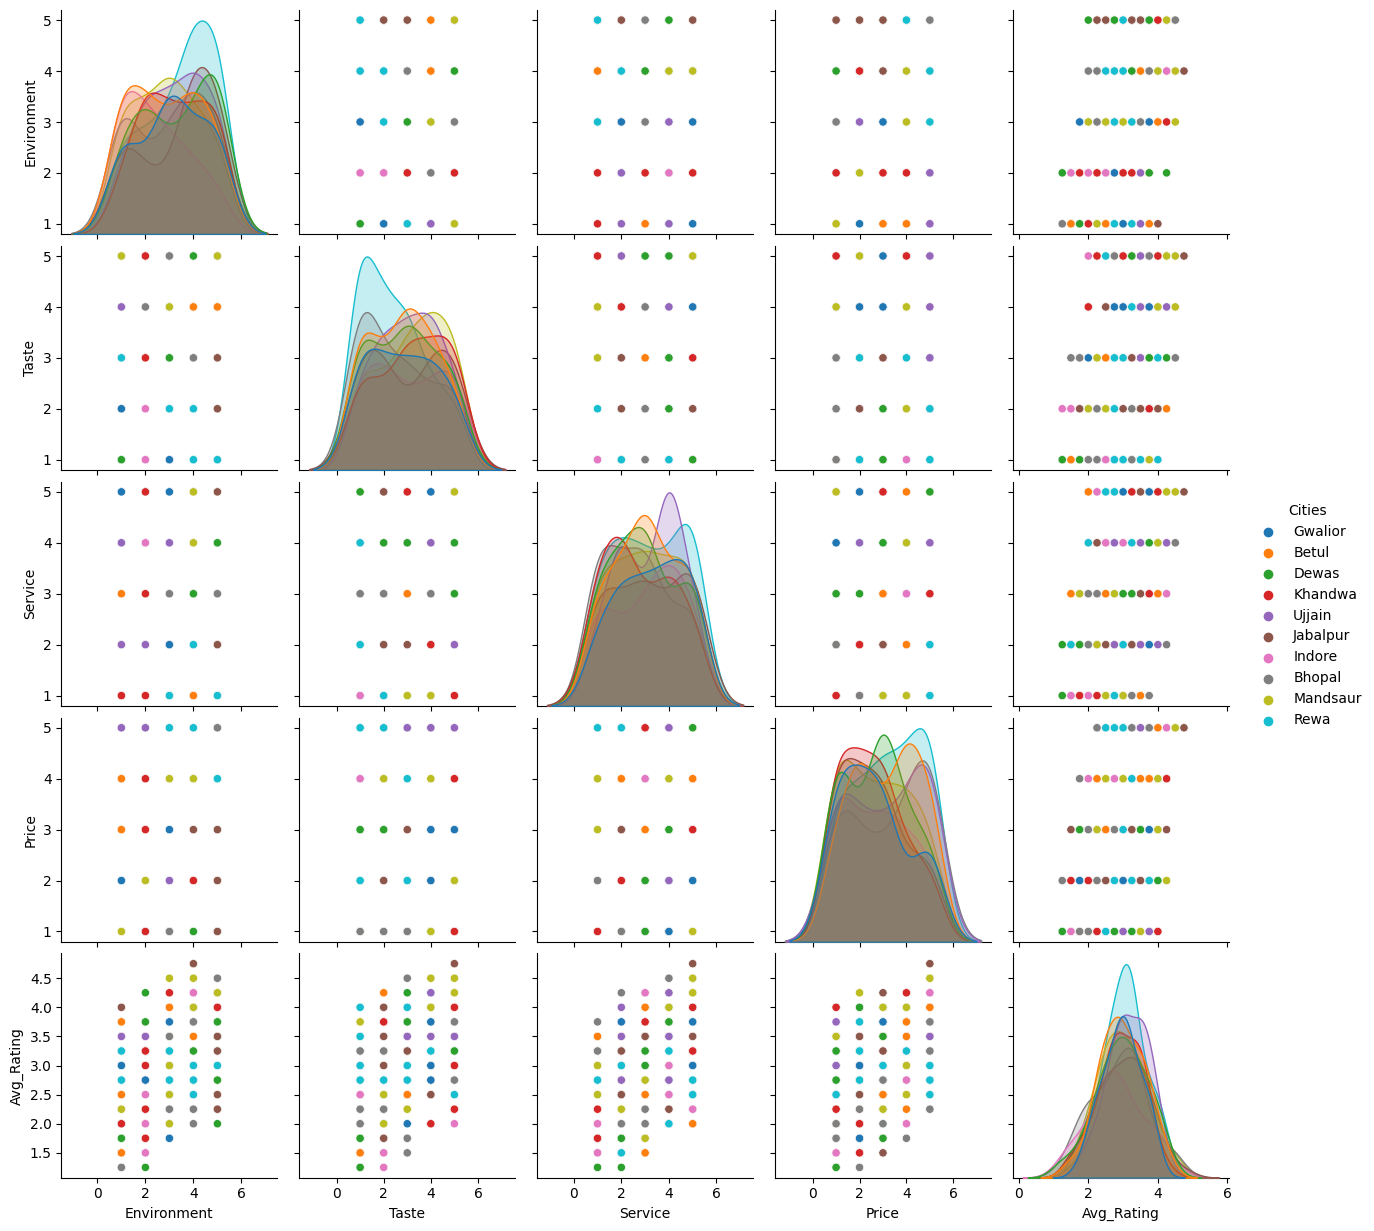

In [318]:
sns.pairplot(dataSet,hue = 'Cities')

## Phase 2

In [425]:
dataSet

,Customer,neg,neu,pos,compound,Environment,Taste,Service,Price,Cities,Review,Avg_Rating
119,1,0.000,1.000,0.000,0.0000,1,3,4,1,Mandsaur,The portion was huge!,2.5
120,2,0.000,1.000,0.000,0.0000,1,1,3,1,Khandwa,"The service was not up to par, either.",2.5
123,3,0.000,1.000,0.000,0.0000,2,4,3,4,Khandwa,Their chow mein is so good!,2.5
124,4,0.000,1.000,0.000,0.0000,3,1,1,4,Dewas,"The dining space is tiny, but elegantly decora...",2.5
127,5,0.000,1.000,0.000,0.0000,5,5,3,2,Mandsaur,I'm probably one of the few people to ever go ...,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...
494,495,0.000,0.525,0.475,0.8738,1,2,1,3,NaN,NaN,NaN
495,496,0.075,0.446,0.479,0.8945,5,1,4,2,NaN,NaN,NaN
496,497,0.000,0.427,0.573,0.9022,2,5,5,4,NaN,NaN,NaN
497,498,0.000,0.339,0.661,0.9136,2,3,4,2,NaN,NaN,NaN


In [337]:
Review_polarity = {}
for i ,row in tqdm(dataSet.iterrows(),total = len(dataSet)):
    text = row['Review']
    myid = row['Customer']
    Review_polarity[myid] = sia.polarity_scores(text)

  0%|          | 0/499 [00:00<?, ?it/s]

In [350]:
pd.DataFrame(Review_polarity).T

,neg,neu,pos,compound
1,0.000,0.435,0.565,0.5994
2,0.445,0.555,0.000,-0.3412
3,0.340,0.660,0.000,-0.5574
4,0.093,0.585,0.322,0.6908
5,0.000,0.728,0.272,0.6249
...,...,...,...,...
495,0.000,1.000,0.000,0.0000
496,0.762,0.238,0.000,-0.7506
497,0.000,0.575,0.425,0.7688
498,0.000,0.693,0.307,0.6114


In [341]:
# dataSet=dataSet.merge(pd.DataFrame(Review_polarity).T.reset_index().rename(columns={"index":"Customer"}),how='right')

In [418]:
temp=pd.DataFrame(Review_polarity).T
temp = temp.sort_values(by = 'compound', ascending = True)
temp=temp.reset_index().rename(columns={"index":"Customer"})
temp

,Customer,neg,neu,pos,compound
0,290,0.408,0.592,0.000,-0.8637
1,45,0.421,0.579,0.000,-0.8402
2,493,0.409,0.591,0.000,-0.8402
3,380,0.275,0.725,0.000,-0.8089
4,47,0.500,0.500,0.000,-0.7900
...,...,...,...,...,...
494,332,0.000,0.525,0.475,0.8738
495,92,0.075,0.446,0.479,0.8945
496,356,0.000,0.427,0.573,0.9022
497,56,0.000,0.339,0.661,0.9136


In [446]:
dataSet.drop(columns = ['neg','neu','pos','compound'],inplace = True)

In [419]:
dataSet = dataSet.sort_values(by = 'Avg_Rating', ascending = True)
dataSet

,Customer,neg,neu,pos,compound,Environment,Taste,Service,Price,Cities,Review,Avg_Rating
119,1,0.000,1.000,0.000,0.0000,2.0,3.0,3.0,2.0,Mandsaur,The portion was huge!,2.5
120,2,0.000,1.000,0.000,0.0000,5.0,1.0,2.0,2.0,Khandwa,"The service was not up to par, either.",2.5
123,3,0.000,1.000,0.000,0.0000,3.0,4.0,2.0,1.0,Khandwa,Their chow mein is so good!,2.5
124,4,0.000,1.000,0.000,0.0000,2.0,2.0,5.0,1.0,Dewas,"The dining space is tiny, but elegantly decora...",2.5
127,5,0.000,1.000,0.000,0.0000,5.0,1.0,3.0,1.0,Mandsaur,I'm probably one of the few people to ever go ...,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...
494,495,0.000,0.525,0.475,0.8738,NaN,NaN,NaN,NaN,NaN,NaN,NaN
495,496,0.075,0.446,0.479,0.8945,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,497,0.000,0.427,0.573,0.9022,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,498,0.000,0.339,0.661,0.9136,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [414]:

dataSet=temp.merge(dataSet,how='left')

In [363]:
dataSet['Sentiment'] = None

In [424]:
dataSet.head()

,Customer,neg,neu,pos,compound,Environment,Taste,Service,Price,Cities,Review,Avg_Rating
119,1,0.0,1.0,0.0,0.0,1,3,4,1,Mandsaur,The portion was huge!,2.5
120,2,0.0,1.0,0.0,0.0,1,1,3,1,Khandwa,"The service was not up to par, either.",2.5
123,3,0.0,1.0,0.0,0.0,2,4,3,4,Khandwa,Their chow mein is so good!,2.5
124,4,0.0,1.0,0.0,0.0,3,1,1,4,Dewas,"The dining space is tiny, but elegantly decora...",2.5
127,5,0.0,1.0,0.0,0.0,5,5,3,2,Mandsaur,I'm probably one of the few people to ever go ...,2.5


In [366]:
for i,val in enumerate(dataSet['compound']):
    if val < 0:
        dataSet['Sentiment'][i] = -1
    elif val > 0:
         dataSet['Sentiment'][i] = 1
    else:
         dataSet['Sentiment'][i] = 0

C:\Users\praja\AppData\Local\Temp\ipykernel_612\1975892609.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataSet['Sentiment'][i] = 1
C:\Users\praja\AppData\Local\Temp\ipykernel_612\1975892609.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataSet['Sentiment'][i] = -1
C:\Users\praja\AppData\Local\Temp\ipykernel_612\1975892609.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataSet['Sentiment'][i] = 0


''

In [369]:
dataSet.sample(10)

,Customer,neg,neu,pos,compound,Environment,Taste,Service,Price,Cities,Review,Avg_Rating,Sentiment
71,72,0.000,1.000,0.000,0.0000,2,2,4,5,Bhopal,#NAME?,3.25,0
356,357,0.263,0.737,0.000,-0.6124,3,1,1,5,Rewa,"Sadly, Gordon Ramsey's Steak is a place we sha...",2.50,-1
21,22,0.000,0.345,0.655,0.5859,1,2,3,4,Ujjain,"The food, amazing.",2.50,1
286,287,0.307,0.693,0.000,-0.4767,4,4,3,2,Mandsaur,Things that went wrong: - They burned the saga...,3.25,-1
166,167,0.000,0.781,0.219,0.6369,4,3,4,2,Bhopal,This place is hands-down one of the best place...,3.25,1
232,233,0.000,0.437,0.563,0.5956,1,1,3,1,Betul,Very very fun chef.,1.50,1
402,403,0.259,0.741,0.000,-0.5411,1,5,4,2,Mandsaur,I don't have to be an accountant to know I'm g...,3.00,-1
244,245,0.000,0.774,0.226,0.4207,3,2,3,4,Mandsaur,"like the other reviewer said ""you couldn't pay...",3.00,1
368,369,0.000,0.423,0.577,0.8481,5,1,2,5,Bhopal,"The staff are great, the ambiance is great.",3.25,1
127,128,0.000,1.000,0.000,0.0000,1,3,2,3,Gwalior,"Phenomenal food, service and ambiance.",2.25,0


In [385]:
df1 = dataSet.sort_values(ascending = True,by = 'compound')
review = df1['Review']
review=review.reset_index()
review.drop(columns = ['index'], inplace = True)
review.head()

,Review
0,Things that went wrong: - They burned the saga...
1,"Everyone is very attentive, providing excellen..."
2,I'd love to go back.
3,We'll never go again.
4,Took an hour to get our food only 4 tables in ...


In [380]:
dataSet = dataSet.sort_values(by = 'Avg_Rating',ascending  = True)

In [386]:
dataSet = dataSet.reset_index()
dataSet['Review'] = review

In [388]:
dataSet

,level_0,index,Customer,neg,neu,pos,compound,Environment,Taste,Service,Price,Cities,Review,Avg_Rating,Sentiment
0,0,10,11,0.000,1.000,0.000,0.0000,1,2,1,1,Indore,Things that went wrong: - They burned the saga...,1.25,0
1,1,324,325,0.000,0.545,0.455,0.6331,1,1,1,2,Bhopal,"Everyone is very attentive, providing excellen...",1.25,1
2,2,153,154,0.000,1.000,0.000,0.0000,1,1,2,1,Dewas,I'd love to go back.,1.25,0
3,3,399,400,0.000,0.654,0.346,0.5719,2,1,1,1,Dewas,We'll never go again.,1.25,1
4,4,176,177,0.000,0.769,0.231,0.2732,2,1,1,2,Khandwa,Took an hour to get our food only 4 tables in ...,1.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,494,385,386,0.274,0.726,0.000,-0.6007,5,3,5,5,Bhopal,"Our server was very nice, and even though he l...",4.50,-1
495,495,406,407,0.000,0.649,0.351,0.4019,3,5,5,5,Mandsaur,I think not again,4.50,1
496,496,81,82,0.122,0.745,0.133,0.0516,4,5,4,5,Indore,Definitely a turn off for me & i doubt I'll be...,4.50,1
497,497,255,256,0.000,0.758,0.242,0.4939,5,4,4,5,Bhopal,This place deserves one star and 90% has to do...,4.50,1
